In [80]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.graphics.regressionplots as smg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP [(Association of Tennis Professionals)](https://www.atptour.com/en/). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

In [81]:
# Load dataset
tennis = pd.read_csv("tennis_stats.csv")
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [82]:
# examine dtypes and shape of dataframe
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [83]:
# examine NA's
tennis.isna().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [84]:
# Drop Player and Year Columns
tennis_clean = tennis.drop(["Player", "Year"], axis=1)
tennis_clean.head()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


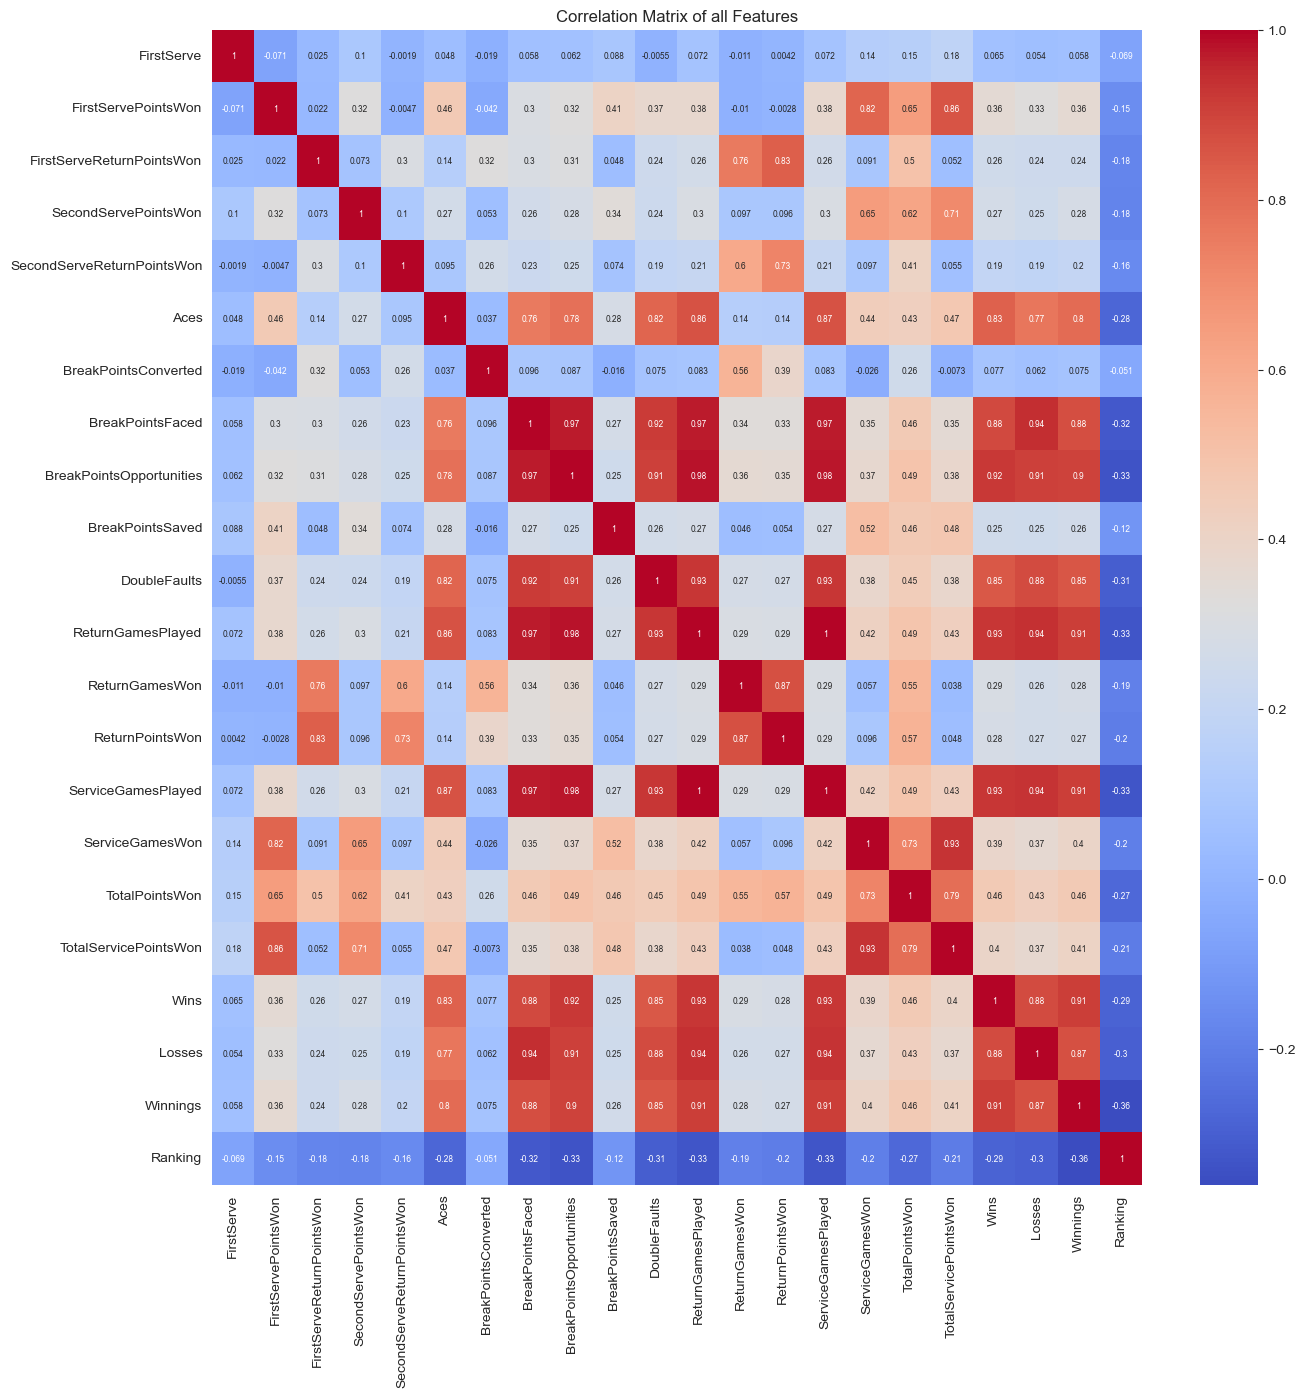

In [85]:
# Create a correlation matrix
corr_matrix = tennis_clean.corr()

# Plot the correlation matrix as heatmap

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size":6})
plt.title("Correlation Matrix of all Features")
plt.show()
plt.close()


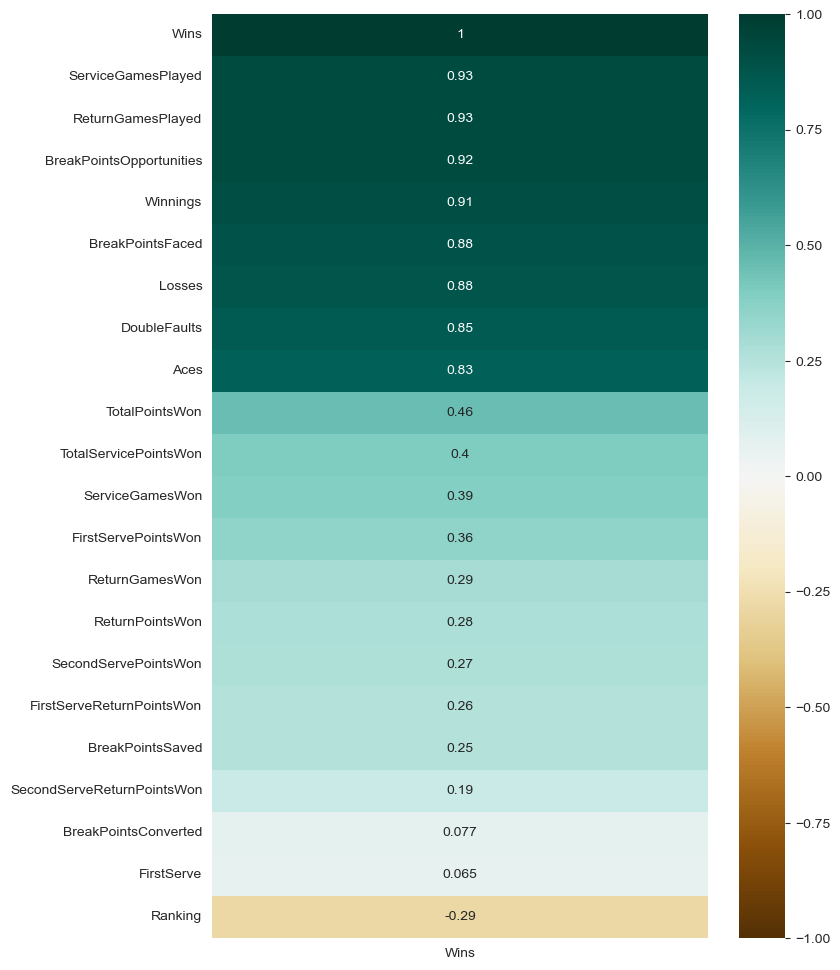

In [86]:


# Create "Heatmap on Target"-Function

def heatmap_on_target(data, target):
    f, ax = plt.subplots(figsize=(8,12))
    ax = sns.heatmap(data[[target]].sort_values(by=target, ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
    plt.show()
    plt.close()

heatmap_on_target(corr_matrix, "Wins")

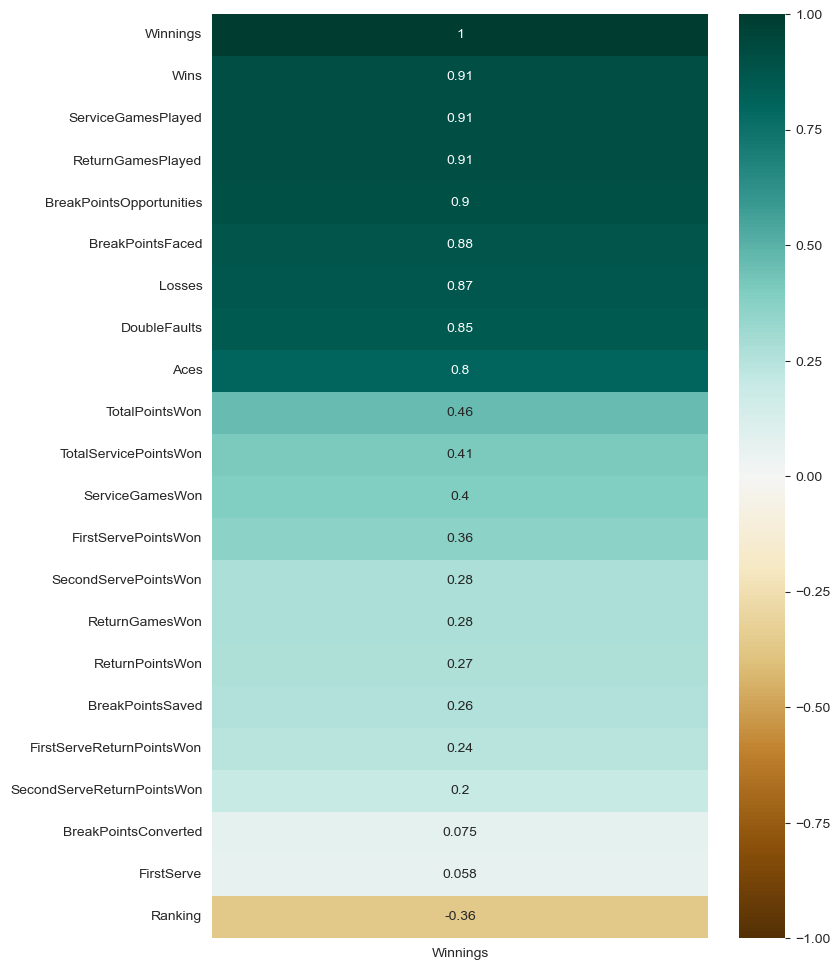

In [87]:
heatmap_on_target(corr_matrix, "Winnings")

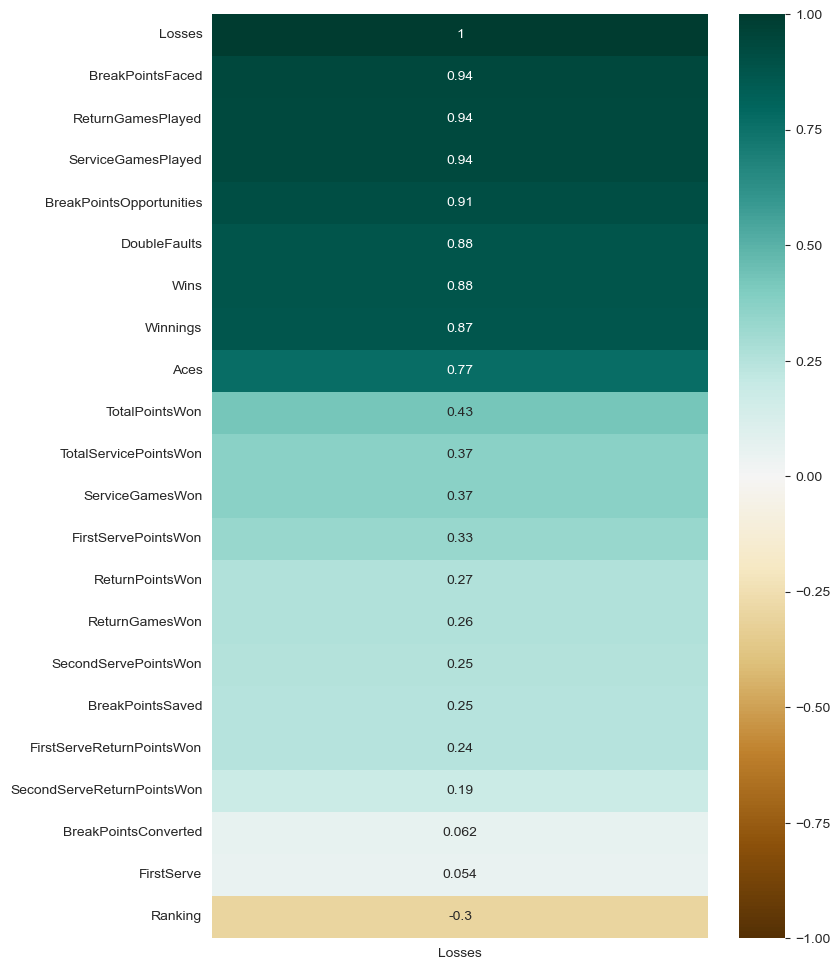

In [88]:
heatmap_on_target(corr_matrix, "Losses")

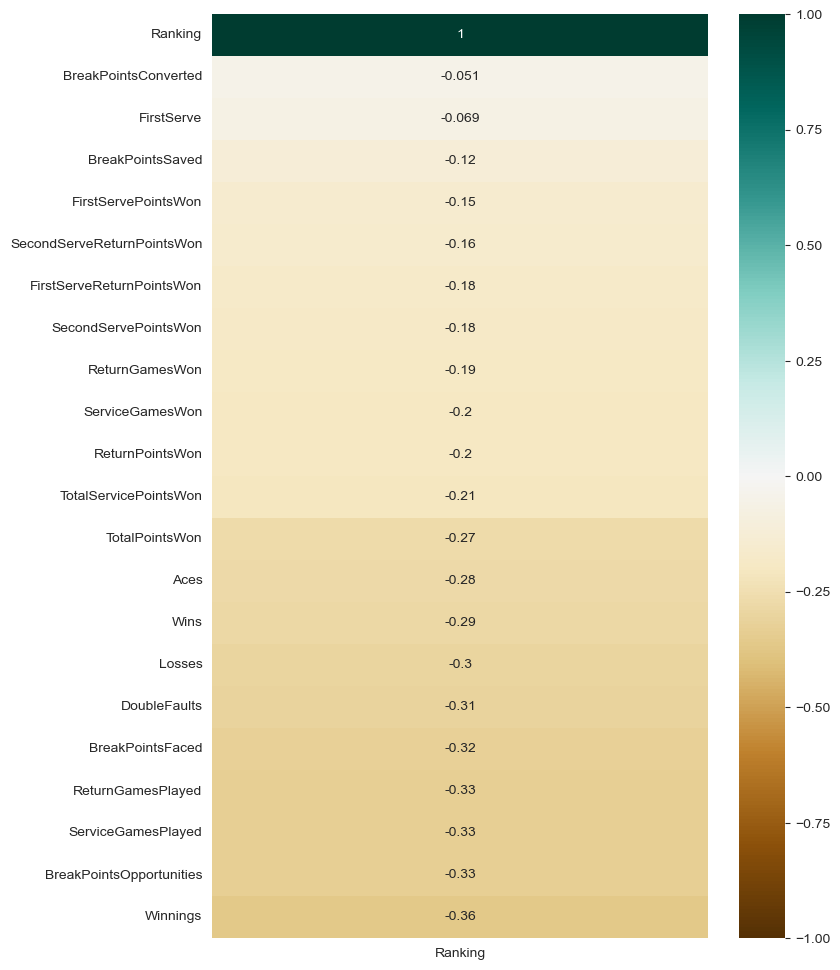

In [89]:
heatmap_on_target(corr_matrix, "Ranking")

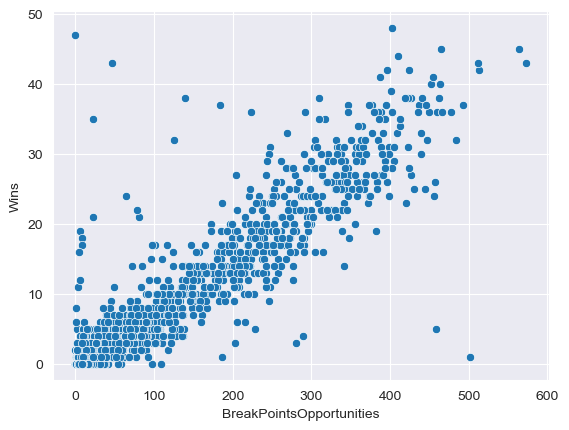

In [90]:
# flat x and y
x = tennis_clean.BreakPointsOpportunities
y = tennis_clean.Wins


sns.scatterplot(x=x, y=y)
plt.show()
plt.close()

In [91]:
# Linear Regression with statsmodels

# Adding intercept b0
x = sm.add_constant(x)

# Create model
model = sm.OLS(y,x)

# Applying .fit()
results = model.fit()

# Getting results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     9956.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:09:01   Log-Likelihood:                -4787.1
No. Observations:                1721   AIC:                             9578.
Df Residuals:                    1719   BIC:                             9589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Dependent variable vs. Exogenous variable plot:** This plot shows the relationship between the dependent variable (y) and the exogenous variable (x) on a scatterplot. It allows you to visually assess the direction and strength of the relationship between the two variables. In this case, we can see that there is a positive relationship between education and prestige, meaning that as education increases, so does prestige.

**Partial regression plot:** This plot shows the relationship between the dependent variable (y) and the exogenous variable (x), with the effect of other exogenous variables held constant (assuming there are other exogenous variables in the model). It allows you to visualize the strength and direction of the relationship between the two variables, while controlling for other variables. In this case, we can see that the positive relationship between education and prestige remains when other variables are held constant.

**Residuals versus education plot:** This plot shows the relationship between the residuals (the difference between the actual and predicted values of y) and the exogenous variable (x) on a scatterplot. It allows you to assess whether there is a pattern in the residuals that suggests a violation of the assumptions of linear regression (e.g., nonlinearity, heteroscedasticity). In this case, we can see that the residuals are randomly scattered around zero, indicating that the assumption of linearity is met.

**Normal Q-Q plot of residuals:** This plot shows the distribution of the residuals compared to a normal distribution. It allows you to assess whether the residuals are normally distributed, which is an assumption of linear regression. In this case, we can see that the residuals follow a relatively straight line, indicating that they are normally distributed.

eval_env: 1


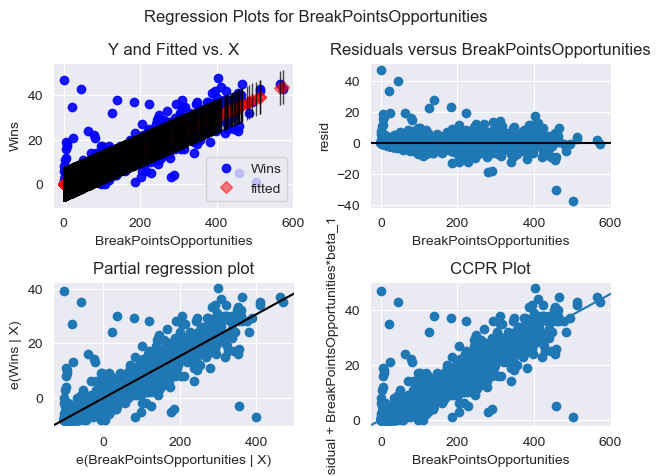

In [92]:
fig = sm.graphics.plot_regress_exog(results, "BreakPointsOpportunities")
fig.tight_layout(pad=1.0)

**Influence Plot:**: The Influence Plot is a useful tool for identifying data points that may have a large impact on the model, such as having high leverage or deviating significantly from the other data points. Points that are in the upper-right and lower-right quadrants have both high leverage and high deviation from the other data points, and can have the greatest impact on the model.

The Influence Plot also includes information on the Cook's D statistic, which is a measure of a data point's influence on the regression estimates. Data points with high Cook's D values may have a significant impact on the model and should be examined more closely.

In summary, Influence Plots can help identify potential issues with data points and aid in deciding whether they should be removed from the model. However, it is important not to make these decisions based solely on the Influence Plot, but to also consider other information such as knowledge of the context of the data or the plausibility of the data points.

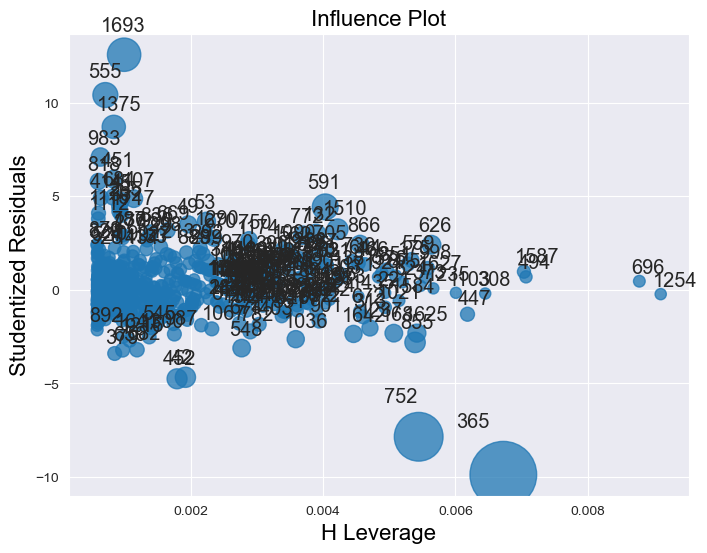

In [93]:
#plot linear regression
fig, ax = plt.subplots(figsize=(8,6))
smg.influence_plot(results, ax=ax)
plt.show()
plt.close()

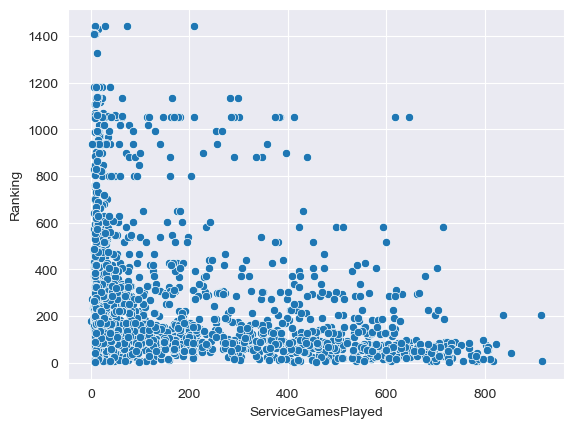

In [94]:
x = tennis_clean.ServiceGamesPlayed
y = tennis_clean.Ranking

sns.scatterplot(x=x, y=y)
plt.show()
plt.close()

In [95]:
# Linear Regression with statsmodel

# Adding intercept b0
x = sm.add_constant(x)

#Create model
model = sm.OLS(y,x)
results = model.fit()

# Getting results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                Ranking   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.74e-45
Time:                        15:09:04   Log-Likelihood:                -12022.
No. Observations:                1721   AIC:                         2.405e+04
Df Residuals:                    1719   BIC:                         2.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                351.8171      8

eval_env: 1


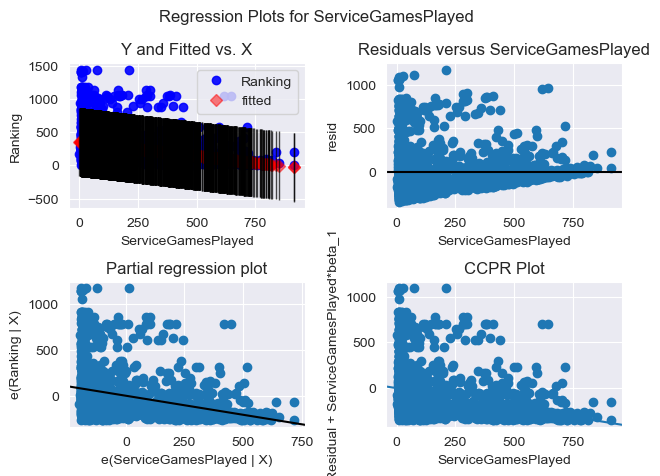

In [96]:
fig = sm.graphics.plot_regress_exog(results, "ServiceGamesPlayed")
fig.tight_layout(pad=1.0)

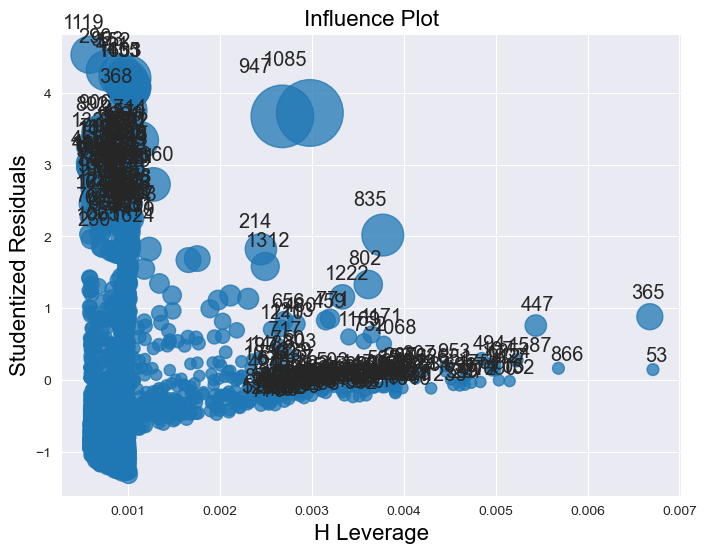

In [97]:
#plot linear regression
fig, ax = plt.subplots(figsize=(8,6))
smg.influence_plot(results, ax=ax)
plt.show()
plt.close()